In [1]:
#importing relevent packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
# importing datasets
df1=pd.read_csv('/content/drive/My Drive/Datastorm/Hotel-A-train.csv')
df2=pd.read_csv('/content/drive/My Drive/Datastorm/Hotel-A-validation.csv')
df3=pd.read_csv('/content/drive/My Drive/Datastorm/Hotel-A-test.csv')

In [46]:
# drop rows which has null values
df1.dropna(inplace=True)
df2.dropna(inplace=True)

In [47]:
# concatenate training and validations datasets
df=pd.concat((df1,df2), axis=0)

In [48]:
# drop reservation id column from train and val datasets. Keep ids in test datasets
df.drop("Reservation-id", axis=1, inplace=True)

id_list = df3["Reservation-id"]
df3.drop("Reservation-id", axis=1, inplace=True)

In [49]:
# chack whether the data set is unbalance or not
df["Reservation_Status"].value_counts()

Check-In    22850
Canceled     4875
No-Show      2523
Name: Reservation_Status, dtype: int64

In [50]:
df.head()

,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,F,40,Latino,Grad,<25K,North,City Hotel,7/1/2015,7/2/2015,5/21/2015,2,2,0,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,218
1,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,7/1/2015,7/2/2015,5/26/2015,3,3,0,BB,No,No,Refundable,Online,Yes,Check-In,No,0,185
2,F,42,caucasian,Grad,<25K,East,City Hotel,7/2/2015,7/6/2015,6/29/2015,3,3,0,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,119
3,M,25,African American,College,>100K,South,Airport Hotels,7/2/2015,7/3/2015,6/20/2015,4,3,0,BB,No,No,Refundable,Agent,Yes,Check-In,Yes,5,144
4,F,62,Latino,High-School,25K --50K,East,Resort,7/3/2015,7/4/2015,6/20/2015,1,1,0,BB,No,No,No Deposit,Direct,No,Check-In,Yes,10,242


In [51]:
import datetime

In [52]:
# convert datetime data to number of dates by substracting from now
def no_of_dates(x):
    _x = x.split('/')
    _y = datetime.datetime.now() - datetime.datetime(int(_x[2]), int(_x[0]), int(_x[1]))
    _y = _y.days
    return _y

In [53]:
df['Booking_date'] = df['Booking_date'].apply(no_of_dates)
df['Expected_checkin'] = df['Expected_checkin'].apply(no_of_dates)
df['Expected_checkout'] = df['Expected_checkout'].apply(no_of_dates)


df3['Booking_date'] = df3['Booking_date'].apply(no_of_dates)
df3['Expected_checkin'] = df3['Expected_checkin'].apply(no_of_dates)
df3['Expected_checkout'] = df3['Expected_checkout'].apply(no_of_dates)

In [54]:
# import encoding packages
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [55]:
categorical_features = ["Ethnicity", "Educational_Level", "Income", "Country_region", "Adults","Children","Hotel_Type", "Meal_Type", "Visted_Previously", "Previous_Cancellations",
                       "Deposit_type", "Booking_channel", "Required_Car_Parking", "Use_Promotion","Gender"]

continuous_features = ['Booking_date','Room_Rate',"Age"]

In [56]:
# replace Reservation_Status column with 1, 2, 3
df.replace(to_replace =["Check-In"], value =1, inplace=True) 
df.replace(to_replace =["Canceled"], value =2, inplace=True) 
df.replace(to_replace =["No-Show"], value =3, inplace=True) 

In [57]:
# encoding 
for feature in categorical_features:
    lbl_enc = LabelEncoder()
    df[feature]=lbl_enc.fit_transform(df[feature]) + 1
    df3[feature]=lbl_enc.fit_transform(df3[feature]) + 1

In [58]:
# Scaling the features
for feature in continuous_features:
    std_enc = StandardScaler()
    df[feature]=std_enc.fit_transform(df[feature].values.reshape(-1,1))
    df3[feature]=std_enc.fit_transform(df3[feature].values.reshape(-1,1))

In [59]:
df_1 = df[categorical_features]
df_2 = df[continuous_features]
df_3 = df["Reservation_Status"]

df=pd.concat((df_1,df_2,df_3), axis=1)

df_1_t = df3[categorical_features]
df_2_t = df3[continuous_features]

df3=pd.concat((df_1_t,df_2_t), axis=1)

In [60]:
x = df.drop("Reservation_Status",axis=1)
y = df.Reservation_Status

x_final_test = df3

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
# divide the combined dataset to test and validation
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.9)

In [63]:
# importing packages to make the dataset balance
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

In [64]:
# balancing dataset
os=SMOTETomek()
# os=NearMiss()
# os=RandomOverSampler()
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [65]:
updated_x = pd.DataFrame(X_train_ns, columns = categorical_features + continuous_features)

In [66]:
updated_y = pd.DataFrame(y_train_ns, columns = ["Reservation_Status"])

In [67]:
from collections import Counter

In [68]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))
# The number of classes before fit Counter({1: 20584, 2: 4364, 3: 2275})
# The number of classes after fit Counter({3: 20579, 2: 20569, 1: 20564})

The number of classes before fit Counter({1: 20580, 2: 4380, 3: 2263})
The number of classes after fit Counter({3: 20576, 2: 20557, 1: 20553})


In [69]:
# check the importancr of each column
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(updated_x ,updated_y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

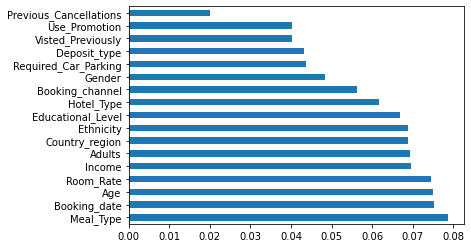

In [ ]:
# rank the importance features
ranked_features=pd.Series(model.feature_importances_,index=updated_x.columns)
ranked_features.nlargest(28).plot(kind='barh')
plt.show()

In [70]:
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

# classifier=RandomForestClassifier(n_estimators=1)

# classifier=xgboost.XGBClassifier()

# classifier=AdaBoostClassifier()#8
classifier = AdaBoostClassifier(learning_rate=0.2,n_estimators=98)




classifier.fit(updated_x,updated_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=98, random_state=None)

In [ ]:
# hyperparameter tuning
n_estimators = [i for i in range(1,101)]
learning_rate=[0.01,0.05,0.1,0.15,0.20]


In [ ]:
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'learning_rate':learning_rate,
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=classifier,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(updated_x, updated_y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   47.3s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  8.0min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 11.9min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.15,
                                                          0.2],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
              

In [ ]:
random_cv.best_estimator_
# AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
#                    n_estimators=98, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=98, random_state=None)

In [71]:
y_pred=classifier.predict(X_test)

In [72]:
df.shape

(30248, 19)

In [73]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average='macro'))

0.3545934058209334


In [74]:
y_final = classifier.predict(x_final_test)

In [75]:
result = pd.DataFrame(data={"Reservation-id":id_list.values, "Reservation_Status":y_final})

In [80]:
result.to_csv('final-2.csv',index=False)

In [76]:
y_final = pd.DataFrame(data={"Reservation_Status":y_final})

**Evaluation** 

In [100]:
#import the original test set
Test_df=pd.read_csv('/content/drive/My Drive/Datastorm/Hotel-A-test.csv')

In [101]:
#concatenate the imported test set with the predicted results
output_df = pd.concat((Test_df,y_final), axis=1)

In [102]:
#filtered the result using reservation status 2 (Cancel)
output_df = output_df.loc[output_df['Reservation_Status'] == 2]

In [103]:
output_df.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Reservation_Status
0,62931593,F,52,Latino,Grad,25K --50K,South,City Hotel,11/18/2016,11/19/2016,10/28/2016,3,3,0,HB,No,No,No Deposit,Direct,Yes,Yes,10,153,2
1,70586099,F,47,Latino,Grad,25K --50K,East,Airport Hotels,11/18/2016,11/19/2016,8/6/2016,2,1,0,FB,No,No,No Deposit,Online,No,No,0,210,2
3,25192322,F,65,caucasian,High-School,25K --50K,South,Airport Hotels,11/18/2016,11/20/2016,5/20/2016,1,3,2,FB,No,No,No Deposit,Online,Yes,Yes,10,107,2
7,90487908,M,45,African American,High-School,<25K,South,Airport Hotels,11/18/2016,11/20/2016,8/1/2016,3,2,1,FB,No,No,No Deposit,Online,No,Yes,10,165,2
8,5595445,F,27,Latino,High-School,50K -- 100K,South,City Hotel,11/18/2016,11/19/2016,6/10/2016,1,1,0,FB,No,No,Non-Refundable,Direct,No,Yes,30,173,2


In [104]:
#calculated total number of persons
output_df["Total_persons"] = output_df["Adults"] + output_df["Children"]

In [105]:
#function to calculate total rooms
def no_of_rooms(persons):
  rooms = persons//5
  if(persons%5 != 0):
    rooms+=1
  
  return rooms

In [106]:
output_df['No_of_rooms'] = output_df['Total_persons'].apply(no_of_rooms)

In [107]:
output_df.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Reservation_Status,Total_persons,No_of_rooms
0,62931593,F,52,Latino,Grad,25K --50K,South,City Hotel,11/18/2016,11/19/2016,10/28/2016,3,3,0,HB,No,No,No Deposit,Direct,Yes,Yes,10,153,2,6,2
1,70586099,F,47,Latino,Grad,25K --50K,East,Airport Hotels,11/18/2016,11/19/2016,8/6/2016,2,1,0,FB,No,No,No Deposit,Online,No,No,0,210,2,3,1
3,25192322,F,65,caucasian,High-School,25K --50K,South,Airport Hotels,11/18/2016,11/20/2016,5/20/2016,1,3,2,FB,No,No,No Deposit,Online,Yes,Yes,10,107,2,4,1
7,90487908,M,45,African American,High-School,<25K,South,Airport Hotels,11/18/2016,11/20/2016,8/1/2016,3,2,1,FB,No,No,No Deposit,Online,No,Yes,10,165,2,5,1
8,5595445,F,27,Latino,High-School,50K -- 100K,South,City Hotel,11/18/2016,11/19/2016,6/10/2016,1,1,0,FB,No,No,Non-Refundable,Direct,No,Yes,30,173,2,2,1


In [108]:
#total price without discount
output_df['Price'] = output_df['No_of_rooms']*output_df["Room_Rate"]

In [112]:
#final price after reducing the discount
output_df['Final_price'] = output_df['Price'] - output_df['Price']*(output_df['Discount_Rate']/100.0)

In [113]:
output_df.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Reservation_Status,Total_persons,No_of_rooms,Price,Final_price
0,62931593,F,52,Latino,Grad,25K --50K,South,City Hotel,11/18/2016,11/19/2016,10/28/2016,3,3,0,HB,No,No,No Deposit,Direct,Yes,Yes,10,153,2,6,2,306,275.4
1,70586099,F,47,Latino,Grad,25K --50K,East,Airport Hotels,11/18/2016,11/19/2016,8/6/2016,2,1,0,FB,No,No,No Deposit,Online,No,No,0,210,2,3,1,210,210.0
3,25192322,F,65,caucasian,High-School,25K --50K,South,Airport Hotels,11/18/2016,11/20/2016,5/20/2016,1,3,2,FB,No,No,No Deposit,Online,Yes,Yes,10,107,2,4,1,107,96.3
7,90487908,M,45,African American,High-School,<25K,South,Airport Hotels,11/18/2016,11/20/2016,8/1/2016,3,2,1,FB,No,No,No Deposit,Online,No,Yes,10,165,2,5,1,165,148.5
8,5595445,F,27,Latino,High-School,50K -- 100K,South,City Hotel,11/18/2016,11/19/2016,6/10/2016,1,1,0,FB,No,No,Non-Refundable,Direct,No,Yes,30,173,2,2,1,173,121.1


In [114]:
#total loss 
expected_revenue_loss = output_df['Final_price'].sum()

In [115]:
expected_revenue_loss

360588.7

## Neural network

In [42]:
### Stacking categorical features
cat_values=np.stack([updated_x[i].values for i in categorical_features],axis=1)

In [43]:
### Stacking continuous features
cont_values=np.stack([updated_x[i].values for i in continuous_features],axis=1)

In [ ]:
### Convert numpy to Tensors
cat_values=torch.tensor(cat_values,dtype=torch.int64)
cont_values=torch.tensor(cont_values,dtype=torch.float)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, no_of_cont_ft, no_of_cat_ft,out_size, layers,p):
        super().__init__()
        self.bn_cont = nn.BatchNorm1d(no_of_cont_ft)
        self.softmax = nn.Softmax()
        
        layerlist = []
        no_in_col = no_of_cat_ft + no_of_cont_ft
        
        for i in layers:
            layerlist.append(nn.Linear(no_in_col,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            no_in_col = i
        layerlist.append(nn.Linear(layers[-1],out_size))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x_cat, x_cont], 1)
        x = self.layers(x)
        return x

In [ ]:
model=FeedForwardNN(len(continuous_features),len(categorical_features),3,[32,64,64,32],p=0.5)

In [ ]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.2)

In [ ]:
y = torch.tensor(updated_y.values, dtype=torch.long).reshape(-1,1)

In [ ]:
batch_size=updated_x.shape[0]
test_size=int(batch_size*0.25)
train_categorical=cat_values[:batch_size-test_size]
test_categorical=cat_values[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [ ]:
abc = torch.cat((train_categorical, train_cont,y_train), 1)
train = torch.utils.data.DataLoader(abc, batch_size=train_categorical.shape[0], num_workers=0, shuffle=True)

In [ ]:
print(train_categorical.shape)
print(train_cont.shape)
print(y_train.shape)

torch.Size([42534, 12])
torch.Size([42534, 3])
torch.Size([42534, 1])


In [ ]:
EPOCHS=2000
final_losses=[]
for i in range(EPOCHS):
    i=i+1
    for data in train:
        # print(data.shape)
        y_pred=model(torch.tensor(data[:,:12], dtype=torch.long),data[:,12:-1])
        loss=torch.sqrt(loss_function(y_pred,torch.tensor(data[:,-1].flatten(),dtype=torch.long)))
        final_losses.append(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if i%10==0:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


Epoch number: 10 and the loss : 0.9882369041442871
Epoch number: 20 and the loss : 0.9668656587600708
Epoch number: 30 and the loss : 0.9511332511901855
Epoch number: 40 and the loss : 0.942490816116333
Epoch number: 50 and the loss : 0.9390646815299988
Epoch number: 60 and the loss : 0.9367454051971436
Epoch number: 70 and the loss : 0.9354872107505798
Epoch number: 80 and the loss : 0.9323863387107849
Epoch number: 90 and the loss : 0.9332525134086609


KeyboardInterrupt: ignored